In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
data_df=pd.read_csv("./loan.csv")

In [3]:
print(data_df.shape)
print(data_df.columns)

(39717, 111)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


### loan related attributes
    loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, issue_d,
    loan_status, purpose

### borrower related attributes
    emp_length, home_ownership, annual_inc, addr_state, dti, verification_status


### Understanding of each column 


| Column Name | Description |
| :- | :-|
| loan_amnt | Amount applied by the borrower |
| funded_amnt_inv | Amount given by the investor |
| annual_inc | annual income of the applicant |
| term | tenure of the loan |
| int_rate | rate of interest for the loan | 
| grade | category assigned by the club | 
| issue_d | date when the loan is issued | 
| loan_status | status of the loan - possible values are Charged Off, Fully Paid |
| purpose | the reason given by the borrower in the loan request |
| emp_length | the experience of the applicant |
| home_ownership | status provided by the borrower, possible values are: RENT, OWN, MORTGAGE, OTHER |
| dti | the ratio of the total debt paid monthly divided by the annual income |
| verification_status | status if the income is verified or not |

In [4]:
loan_df=data_df[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','issue_d','loan_status','purpose','emp_length','home_ownership','annual_inc','addr_state','dti','verification_status']]

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   issue_d              39717 non-null  object 
 9   loan_status          39717 non-null  object 
 10  purpose              39717 non-null  object 
 11  emp_length           38642 non-null  object 
 12  home_ownership       39717 non-null  object 
 13  annual_inc           39717 non-null  float64
 14  addr_state           39717 non-null  object 
 15  dti                  39717 non-null 

### Find the null values in all columns

In [6]:
loan_df.isna().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
issue_d                   0
loan_status               0
purpose                   0
emp_length             1075
home_ownership            0
annual_inc                0
addr_state                0
dti                       0
verification_status       0
dtype: int64

In [7]:
loan_df['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

### dropping rows whose emp_length is NA as data imputation is not required for this assignment(suggested by instructor)

In [8]:
loan_df=loan_df[~(loan_df['emp_length'].isna())]

## Column type conversion

### columns are 
    term
    int_rate
    grade
    sub_grade
    issue_d
    loan_status
    purpose
    emp_length
    home_ownership
    addr_state
    verification_status

### Term - converting to int

In [9]:
loan_df['term']=loan_df['term'].str.replace(' months','',regex=False)
loan_df['term']=loan_df['term'].astype('int')
loan_df['term'].value_counts()

36    28287
60    10355
Name: term, dtype: int64

### Interest rate - converting to float

In [10]:
loan_df['int_rate']=loan_df['int_rate'].str.replace('%','',regex=False)
loan_df['term']=loan_df['term'].astype('float')
loan_df['int_rate'].value_counts()

10.99    932
13.49    813
11.49    800
7.51     756
7.88     701
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64

### grade and sub grade - converting to string

In [11]:
loan_df['grade']=loan_df['grade'].astype('string')
loan_df['sub_grade']=loan_df['sub_grade'].astype('string')

### converting issue date to a date type

In [12]:
from datetime import datetime
loan_df['issue_d']= loan_df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y') if type(x)==str else np.NaN)

### converting loan status to a string. dropping data with current loan status as it will not be helpful

In [13]:
loan_df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [14]:
loan_df=loan_df[~(loan_df['loan_status']=='Current')]
loan_df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

In [15]:
loan_df['loan_status']=loan_df['loan_status'].astype('string')

### converting purpose to a string type column

In [16]:
loan_df['purpose']=loan_df['purpose'].astype('string')
loan_df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: Int64

### converting employee length to a numeric type column

In [17]:
loan_df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [18]:
loan_df['emp_length']=loan_df['emp_length'].str.replace(' years','',regex=False)
loan_df['emp_length']=loan_df['emp_length'].str.replace(' year','',regex=False)

In [19]:
loan_df['emp_length']=loan_df['emp_length'].str.replace('10+','10',regex=False)
loan_df['emp_length']=loan_df['emp_length'].str.replace('< 1','0',regex=False)

In [20]:
loan_df['emp_length']=loan_df['emp_length'].astype('int')

### converting home_ownership to string type column

In [21]:
loan_df['home_ownership']=loan_df['home_ownership'].astype('string')
loan_df['home_ownership'].value_counts()

RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: home_ownership, dtype: Int64

In [22]:
loan_df[loan_df['home_ownership']=="NONE"]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,issue_d,loan_status,purpose,emp_length,home_ownership,annual_inc,addr_state,dti,verification_status
39318,10000,10000,1228.06,36.0,7.75,312.22,A,A3,2008-01-01,Fully Paid,debt_consolidation,5,NONE,22200.0,VA,5.24,Not Verified
39659,4000,4000,1925.00,36.0,9.64,128.41,B,B4,2007-08-01,Fully Paid,other,0,NONE,100000.0,CA,15.00,Not Verified
39660,2800,2800,1625.00,36.0,8.70,88.65,B,B1,2007-08-01,Fully Paid,other,0,NONE,120000.0,MA,15.00,Not Verified


### converting addr_state to a string column type

In [23]:
loan_df['addr_state']=loan_df['addr_state'].astype('string')

### converting verification status to a string type column

In [24]:
loan_df['verification_status']=loan_df['verification_status'].astype('string')
loan_df['verification_status'].value_counts()

Not Verified       16278
Verified           11772
Source Verified     9494
Name: verification_status, dtype: Int64

### converting interest rate to a float type column

In [25]:
loan_df['int_rate']=loan_df['int_rate'].astype('float')

In [26]:
loan_df.shape

(37544, 17)

### Analyze single columns 
    annual income
    loan amount
    funded amount invested
    emp length
    loan status
    purpose
    grade
    home ownership
    issue date
    verification status
    term
    interest rate

In [27]:
loan_df['annual_inc'].describe()

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

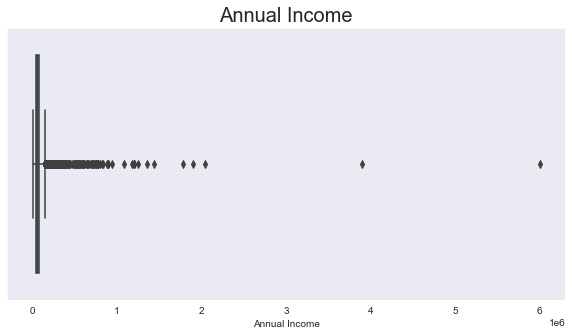

In [28]:
sns.set_style("dark")
plt.figure(figsize=(10,5))
sns.boxplot(loan_df['annual_inc'])
plt.title("Annual Income",fontsize=20)
plt.xlabel("Annual Income",fontsize=10)
plt.savefig('annual_inc.png',bbox_inches ="tight")
plt.show()

### Finding outliers in annual income column
    Found many outliers in the income column data. 
    Dropping them using IQR method (values less then Q1- 1.5*IQR and values more than Q3+15*IQR)

In [29]:
Q1=np.quantile(loan_df['annual_inc'],.25)
Q3=np.quantile(loan_df['annual_inc'],.75)
iqr=Q3-Q1
print(Q1,Q3,iqr)

41000.0 83000.0 42000.0


In [30]:
loan_df=loan_df[~((loan_df['annual_inc'] < (Q1 - 1.5 * iqr)) | (loan_df['annual_inc'] > (Q3 + 1.5 * iqr)))]

### Analyze loan amount column

In [31]:
loan_df['loan_amnt'].describe()

count    35814.000000
mean     10775.740632
std       7075.678330
min        500.000000
25%       5100.000000
50%       9500.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

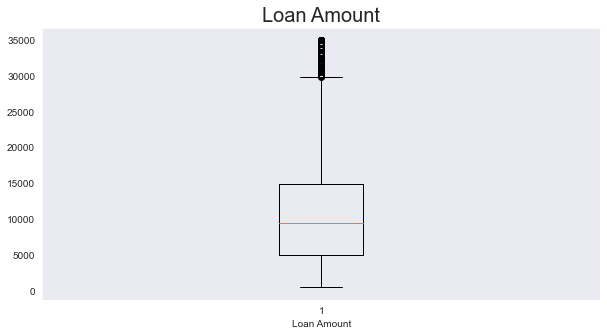

In [32]:
plt.figure(figsize=(10,5))
plt.boxplot(loan_df['loan_amnt'])
plt.title("Loan Amount", fontsize=20)
plt.xlabel("Loan Amount", fontsize=10)
plt.savefig('loan_amnt.png')
plt.show()

Insights<br>
    Most of the borrowers applied for loan amount between 5000 and 15000

### Analyze funded amount by investors column - this is the actual amount given to the borrower

In [33]:
loan_df['funded_amnt_inv'].describe()

count    35814.000000
mean      9970.409645
std       6762.355057
min          0.000000
25%       5000.000000
50%       8450.000000
75%      13750.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

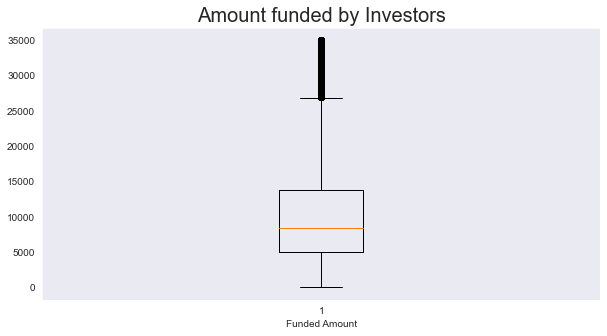

In [34]:
plt.figure(figsize=(10,5))
plt.boxplot(loan_df['funded_amnt_inv'])
plt.title("Amount funded by Investors",fontsize=20)
plt.xlabel("Funded Amount",fontsize=10)
plt.savefig('funded_amnt.png')
plt.show()

Insights<br>
    Most of the borrowers received the loan amount between 5000 and 15000 
    There is a small change in the average amount applied and received by the borrower

### Added a new column with the difference of amount from loan amount to the funded amount invested(loan amount minus funded amount invested)

In [35]:
loan_df['loan_amnt_diff']=loan_df['loan_amnt']-loan_df['funded_amnt_inv']

In [36]:
loan_df['emp_length'].describe()

count    35814.000000
mean         4.902301
std          3.547914
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

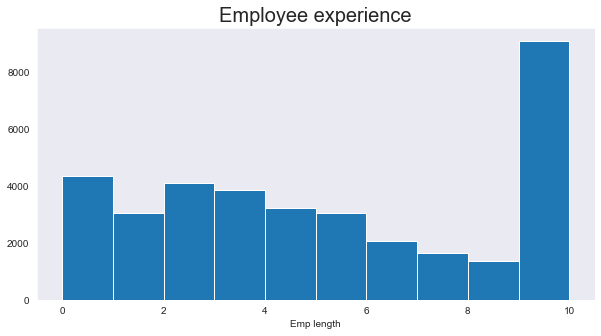

In [37]:
plt.figure(figsize=(10,5))
plt.hist(loan_df['emp_length'])
plt.title("Employee experience",fontsize=20)
plt.xlabel("Emp length",fontsize=10)
plt.savefig('emp_length.png')
plt.show()

#### Most of the loan applicants are having 10+ years of experience

### Analyzing loan status column 

#### Translate loan status to numbers
        fully paid -0, charged off-1

In [38]:
def translate_loan_status(x):
    if x=="Fully Paid":
        return 0
    elif x=="Charged Off":
        return 1  

In [39]:
loan_df['loan_status_numeric']=loan_df['loan_status'].apply(translate_loan_status)

In [40]:
loan_df['purpose'].value_counts()

debt_consolidation    17007
credit_card            4681
other                  3561
home_improvement       2496
major_purchase         1984
small_business         1588
car                    1406
wedding                 885
medical                 621
moving                  528
vacation                339
house                   325
educational             306
renewable_energy         87
Name: purpose, dtype: Int64

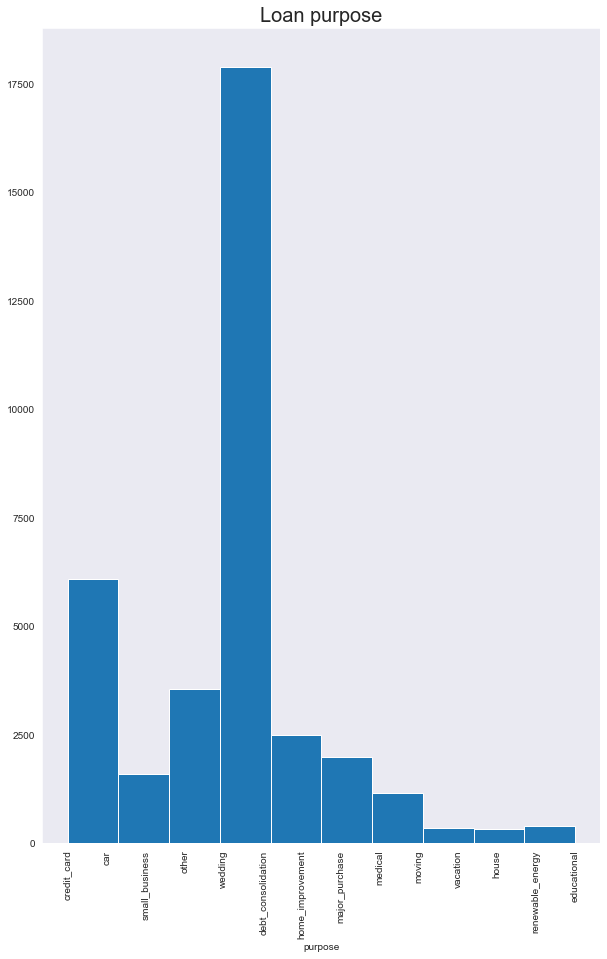

In [41]:
plt.figure(figsize=(10,15))
plt.title("Loan purpose",fontsize=20)
plt.xlabel("purpose",fontsize=10)
plt.hist(loan_df['purpose'])
plt.xticks(rotation=90)
plt.savefig('purpose.png')
plt.show()

#### Most of the loan applicants are applying with the debt consolidation as the purpose

### Analyze grade column

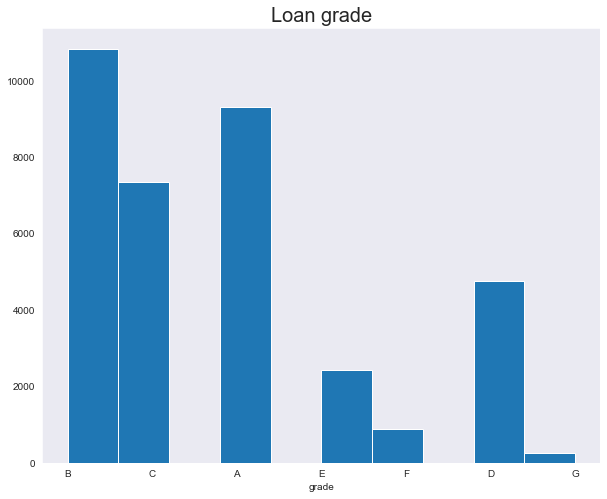

In [42]:
plt.figure(figsize=(10,8))
plt.title("Loan grade",fontsize=20)
plt.xlabel("grade",fontsize=10)
plt.hist(loan_df['grade'])
plt.savefig('grade.png')
plt.show()

#### Most of the applicants are in A,B and C grades

###  Analyze home ownership column

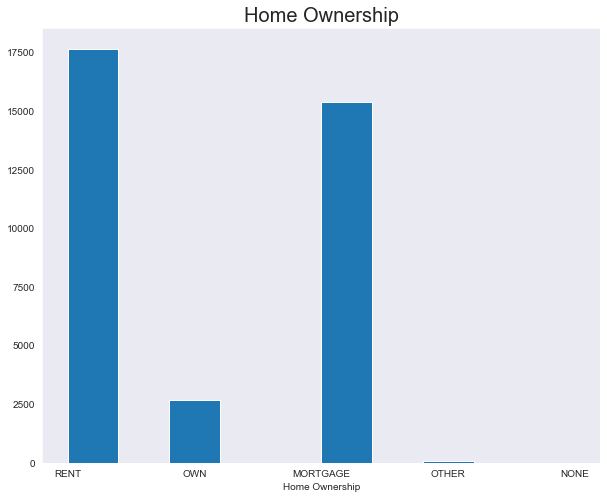

In [43]:
plt.figure(figsize=(10,8))
plt.title("Home Ownership",fontsize=20)
plt.xlabel("Home Ownership",fontsize=10)
plt.hist(loan_df['home_ownership'])
plt.savefig('home.png')
plt.show()

In [44]:
loan_df['home_ownership'].value_counts()

RENT        17666
MORTGAGE    15393
OWN          2659
OTHER          93
NONE            3
Name: home_ownership, dtype: Int64

### The borrowers having RENT and MORTGAGE as home ownership are the top applicants

### Analyze loan issue date column. create new columns from extracting the month and year from issue_d

In [45]:
loan_df['issued_year']=pd.DatetimeIndex(loan_df['issue_d']).year

In [46]:
loan_df['issued_month']=pd.DatetimeIndex(loan_df['issue_d']).month

### Analyze verification status column

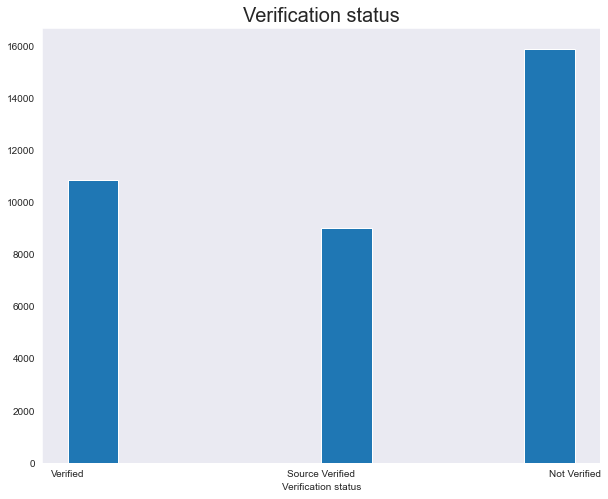

In [47]:
plt.figure(figsize=(10,8))
plt.title("Verification status",fontsize=20)
plt.xlabel("Verification status",fontsize=10)
plt.hist(loan_df['verification_status'])
plt.savefig('ver_status.png')
plt.show()

#### Most of the applicants' income is not verified by LC

### Analyze term column

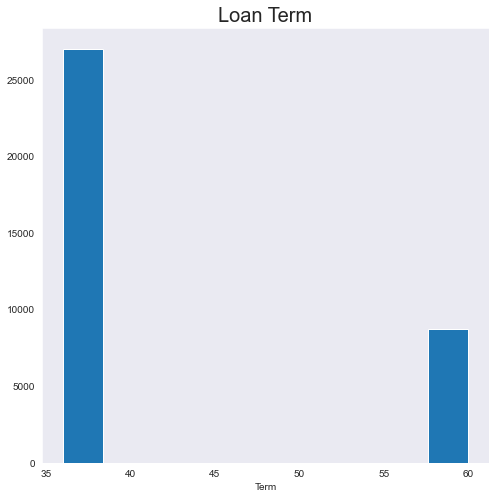

In [48]:
plt.figure(figsize=(8,8))
plt.title("Loan Term",fontsize=20)
plt.xlabel("Term",fontsize=10)
plt.hist(loan_df['term'])
plt.savefig('term.png')
plt.show()

#### Most of the loans are having 36 months as loan term

### Analyze interest rate column

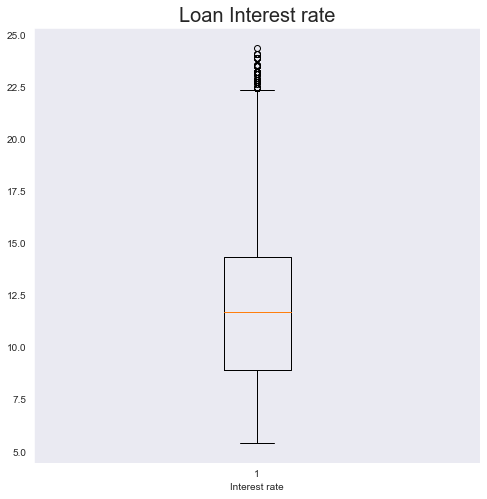

In [49]:
plt.figure(figsize=(8,8))
plt.title("Loan Interest rate",fontsize=20)
plt.xlabel("Interest rate",fontsize=10)
plt.boxplot(loan_df['int_rate'])
plt.savefig('interest.png')
plt.show()

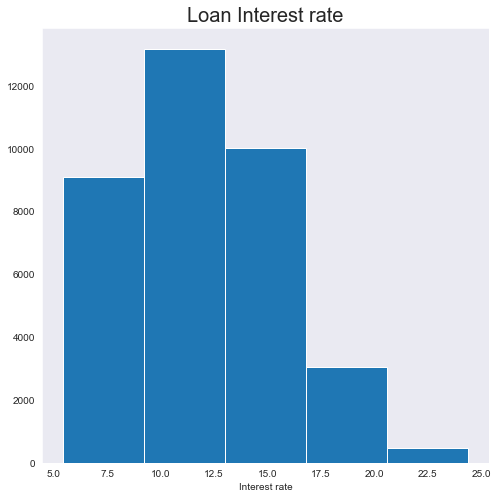

In [50]:
plt.figure(figsize=(8,8))
plt.title("Loan Interest rate",fontsize=20)
plt.xlabel("Interest rate",fontsize=10)
plt.hist(loan_df['int_rate'],bins=5)
plt.savefig('interest_hist.png')
plt.show()

In [51]:
loan_df['int_rate'].describe()

count    35814.000000
mean        11.921674
std          3.660202
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

#### The average interest rate falls in between 9 and 14

# Analyzing two columns

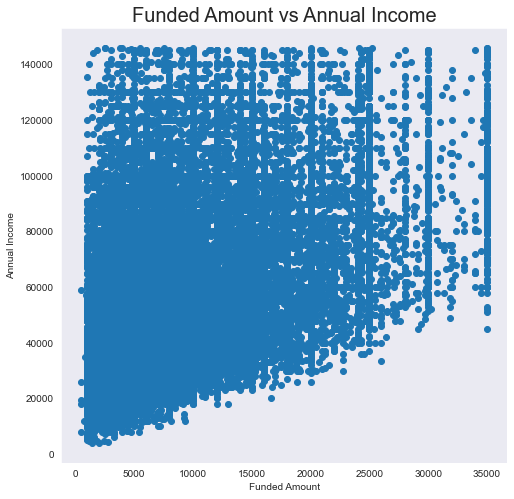

In [52]:
plt.figure(figsize=(8,8))
plt.scatter(loan_df['funded_amnt'],loan_df['annual_inc'])
plt.title("Funded Amount vs Annual Income",fontsize=20)
plt.xlabel("Funded Amount",fontsize=10)
plt.ylabel("Annual Income",fontsize=10)
plt.savefig('loan_income.png')
plt.show()

### The loan amount/funded amount increases with the increase in the annual income

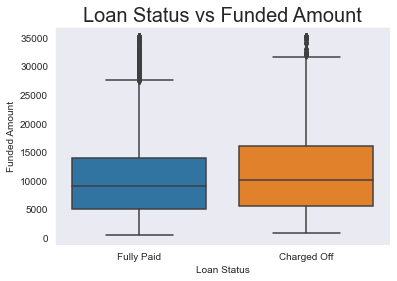

In [53]:
sns.boxplot(loan_df['loan_status'],loan_df['funded_amnt'])
plt.title("Loan Status vs Funded Amount",fontsize=20)
plt.xlabel("Loan Status",fontsize=10)
plt.ylabel("Funded Amount",fontsize=10)
plt.savefig('loan_funded.png')
plt.show()

### The average funded amount for charged off applicants is more than that of Fully paid applicants

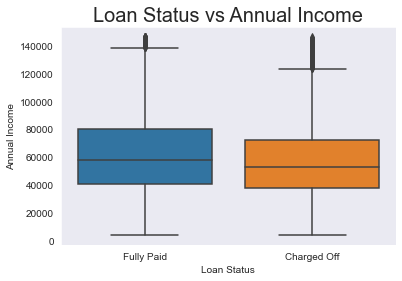

In [54]:
sns.boxplot(loan_df['loan_status'],loan_df['annual_inc'])
plt.title("Loan Status vs Annual Income",fontsize=20)
plt.xlabel("Loan Status",fontsize=10)
plt.ylabel("Annual Income",fontsize=10)
plt.savefig('loan_status_income.png')
plt.show()

### The average annual income for charged off applicants is less than that of Fully paid applicants

In [55]:
# created a new derived column with the funded amount column and the annual income column
loan_df['loan_income_proportion']=(loan_df['funded_amnt']/loan_df['annual_inc'])*100

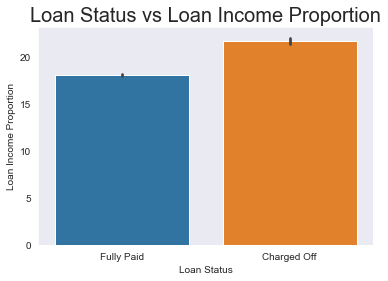

In [56]:
sns.barplot(loan_df['loan_status'],loan_df['loan_income_proportion'])
plt.title("Loan Status vs Loan Income Proportion",fontsize=20)
plt.xlabel("Loan Status",fontsize=10)
plt.ylabel("Loan Income Proportion",fontsize=10)
plt.savefig('loan_status_proportion.png')
plt.show()

### The chances of defaulting are more when the funded amount to income proportion is more.

### Analyze home ownership vs loan income proportion 

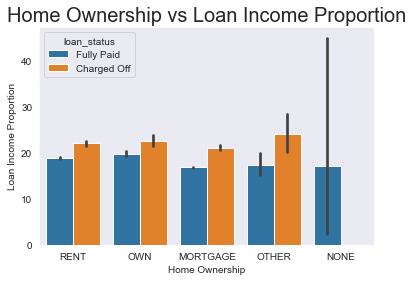

In [57]:
sns.barplot(data=loan_df, x="home_ownership",y="loan_income_proportion",hue="loan_status")
plt.title("Home Ownership vs Loan Income Proportion",fontsize=20)
plt.xlabel("Home Ownership",fontsize=10)
plt.ylabel("Loan Income Proportion",fontsize=10)
plt.savefig('home_proportion.png')
plt.show()

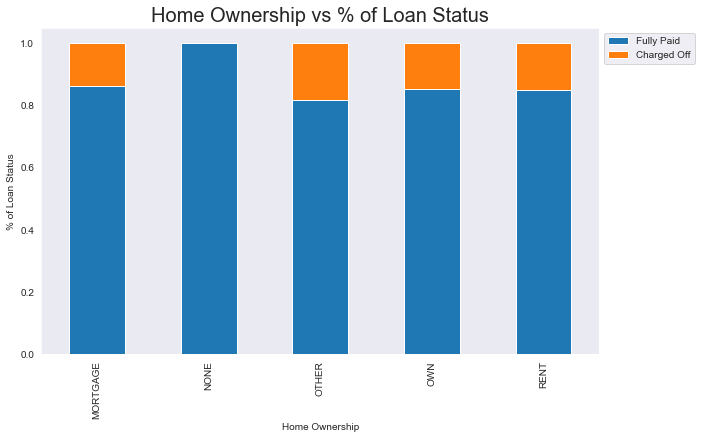

In [58]:
home_loan_status_table = pd.crosstab(index=loan_df["home_ownership"], 
                          columns=loan_df["loan_status"])
home_loan_status_table_perc = home_loan_status_table[["Fully Paid","Charged Off"]].apply(lambda x: x/x.sum(), axis=1)
home_loan_status_table_perc.plot(kind="bar", stacked="True", figsize=[10,6])
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Home Ownership vs % of Loan Status",fontsize=20)
plt.xlabel("Home Ownership",fontsize=10)
plt.ylabel("% of Loan Status",fontsize=10)
plt.savefig('home_percent_status.png')
plt.show()

#### 20% of the applicants are likely to default more in any category of home ownership

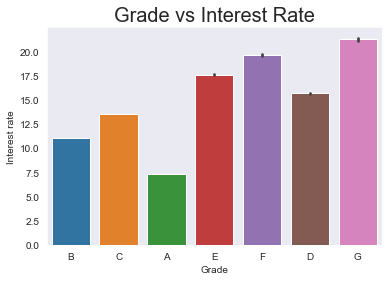

In [59]:
sns.barplot(data=loan_df, x="grade",y="int_rate")
plt.title("Grade vs Interest Rate",fontsize=20)
plt.xlabel("Grade",fontsize=10)
plt.ylabel("Interest rate",fontsize=10)
plt.savefig('grade_interest.png')
plt.show()

#### The interest rate is higher for grades F and G so the loans within these grades are risky

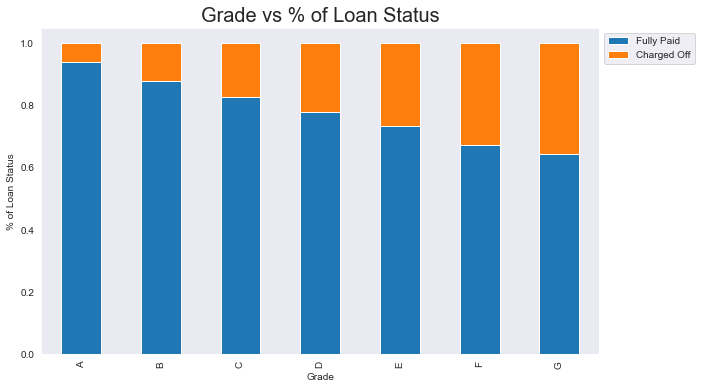

In [60]:
grade_loan_status_table = pd.crosstab(index=loan_df["grade"], 
                          columns=loan_df["loan_status"])
grade_loan_status_table_perc = grade_loan_status_table[["Fully Paid","Charged Off"]].apply(lambda x: x/x.sum(), axis=1)
grade_loan_status_table_perc.plot(kind="bar", stacked="True", figsize=[10,6])
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Grade vs % of Loan Status",fontsize=20)
plt.xlabel("Grade",fontsize=10)
plt.ylabel("% of Loan Status",fontsize=10)
plt.savefig('grade_percent_status.png')
plt.show()

#### The chances are more to default with the loans in the grades like E,F and G grades

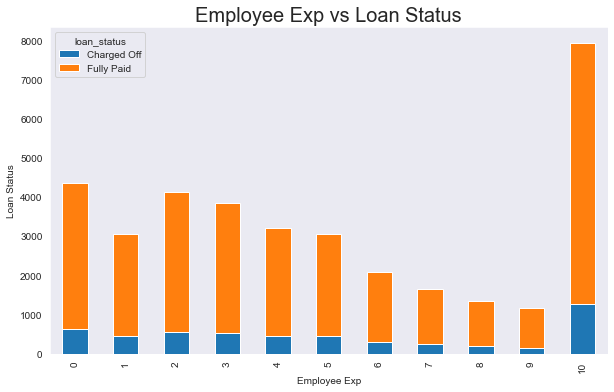

In [61]:
emp_length_loan_status_table = pd.crosstab(index=loan_df["emp_length"], 
                          columns=loan_df["loan_status"])
#emp_length_loan_status_table_perc = emp_length_loan_status_table[["Fully Paid","Charged Off"]].apply(lambda x: x/x.sum(), axis=1)
emp_length_loan_status_table.plot(kind="bar", stacked="True", figsize=[10,6])
plt.title("Employee Exp vs Loan Status",fontsize=20)
plt.xlabel("Employee Exp",fontsize=10)
plt.ylabel("Loan Status",fontsize=10)
plt.savefig('employee_status.png')
plt.show()

#### There are higher chances of an employee with 10+ years of experience when compared with the experience of other employees

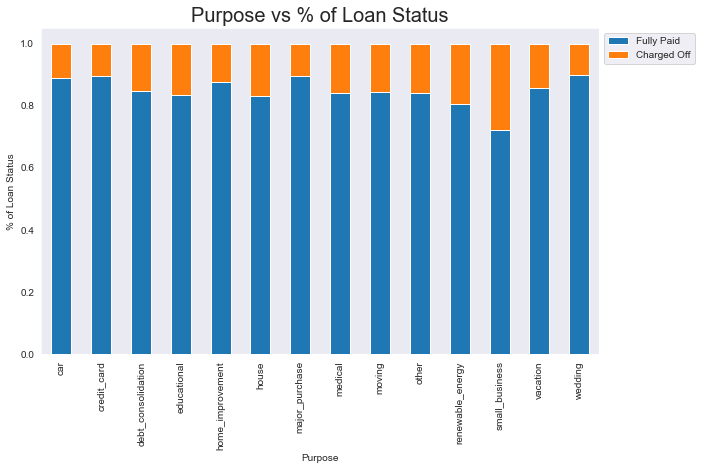

In [62]:
purpose_loan_status_table = pd.crosstab(index=loan_df["purpose"], 
                          columns=loan_df["loan_status"])
purpose_loan_status_table_perc = purpose_loan_status_table[["Fully Paid","Charged Off"]].apply(lambda x: x/x.sum(), axis=1)
purpose_loan_status_table_perc.plot(kind="bar", stacked="True", figsize=[10,6])
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Purpose vs % of Loan Status",fontsize=20)
plt.xlabel("Purpose",fontsize=10)
plt.ylabel("% of Loan Status",fontsize=10)
plt.savefig('purpose_percent_status.png')
plt.show()

#### The applicants applying for small business are having good chances to get defaulted.

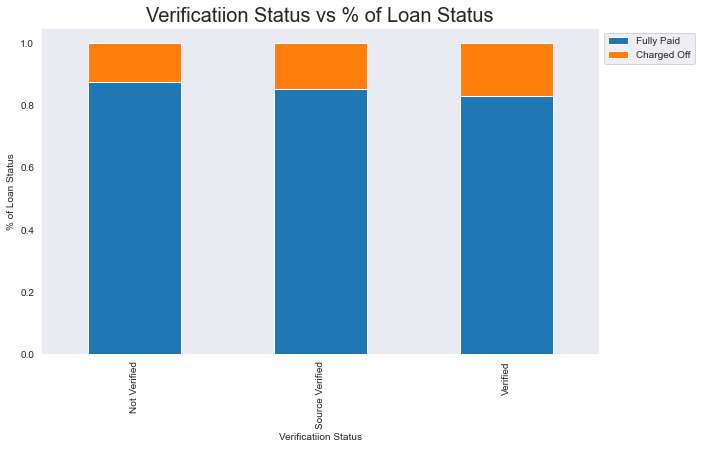

In [63]:
verification_loan_status_table = pd.crosstab(index=loan_df["verification_status"], 
                          columns=loan_df["loan_status"])
verification_loan_status_table_perc = verification_loan_status_table[["Fully Paid","Charged Off"]].apply(lambda x: x/x.sum(), axis=1)

verification_loan_status_table_perc.plot(kind="bar", stacked="True", figsize=[10,6])
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Verificatiion Status vs % of Loan Status",fontsize=20)
plt.xlabel("Verificatiion Status",fontsize=10)
plt.ylabel("% of Loan Status",fontsize=10)
plt.savefig('verf_status_percent_status.png')
plt.show()

#### 10-15% of the applicants are likely to default in any category of the verification status

In [64]:
loan_df['interest_buckets']=pd.qcut(loan_df['int_rate'],[0,0.2,.4,.6,.8,1],labels=["A","B","C","D","E"])

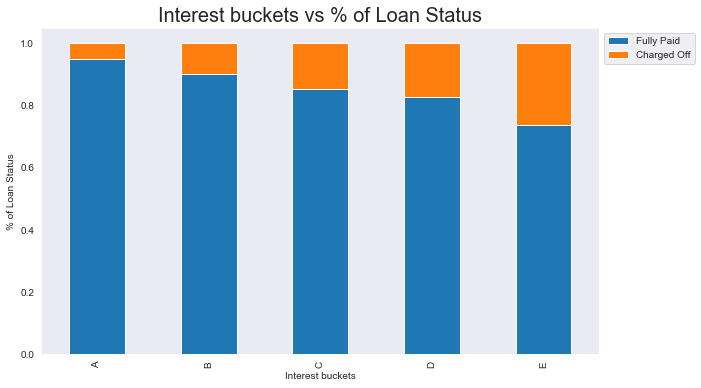

In [65]:
interest_buckets_loan_status_table = pd.crosstab(index=loan_df["interest_buckets"], 
                          columns=loan_df["loan_status"])
interest_buckets_loan_status_table_perc = interest_buckets_loan_status_table[["Fully Paid","Charged Off"]].apply(lambda x: x/x.sum(), axis=1)
interest_buckets_loan_status_table_perc.plot(kind="bar", stacked="True", figsize=[10,6])
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Interest buckets vs % of Loan Status",fontsize=20)
plt.xlabel("Interest buckets",fontsize=10)
plt.ylabel("% of Loan Status",fontsize=10)
plt.savefig('interest_buckets_percent_status.png')
plt.show()

### The higher the interest rates the higher the chances for defaulting

In [66]:
loan_df['income_buckets']=pd.qcut(loan_df['annual_inc'],[0,0.2,.4,.6,.8,1],labels=["A","B","C","D","E"])

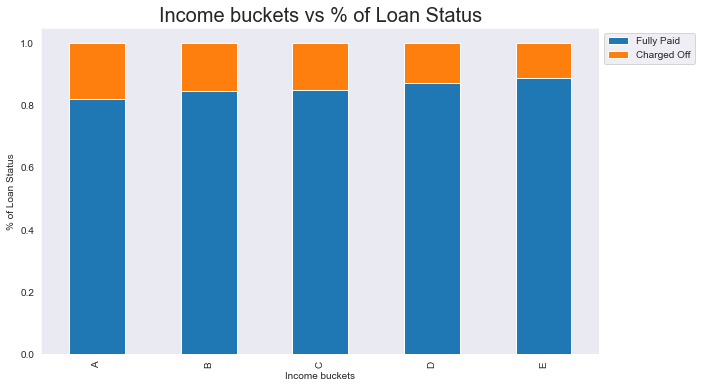

In [67]:
income_buckets_loan_status_table = pd.crosstab(index=loan_df["income_buckets"], 
                          columns=loan_df["loan_status"])
income_buckets_loan_status_table_perc = income_buckets_loan_status_table[["Fully Paid","Charged Off"]].apply(lambda x: x/x.sum(), axis=1)

income_buckets_loan_status_table_perc.plot(kind="bar", stacked="True", figsize=[10,6])
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Income buckets vs % of Loan Status",fontsize=20)
plt.xlabel("Income buckets",fontsize=10)
plt.ylabel("% of Loan Status",fontsize=10)
plt.savefig('income_buckets_percent_status.png')
plt.show()

### The lower income applicants are likely to default more than that of higher income applicants

In [68]:
loan_df['loan_amnt_buckets']=pd.qcut(loan_df['funded_amnt'],[0,0.2,.4,.6,.8,1],labels=["A","B","C","D","E"])

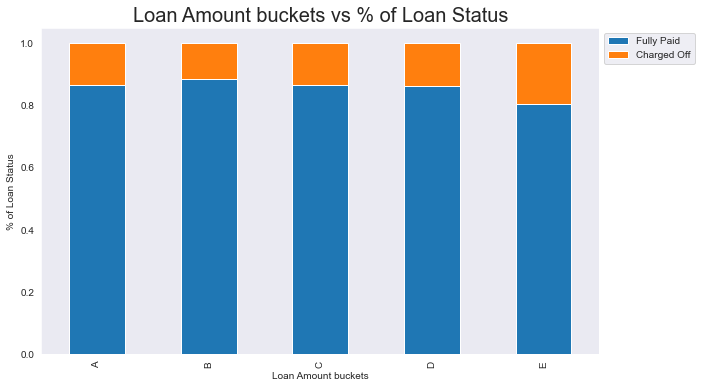

In [69]:
loan_amnt_buckets_loan_status_table = pd.crosstab(index=loan_df["loan_amnt_buckets"], 
                          columns=loan_df["loan_status"])
loan_amnt_buckets_loan_status_table_perc = loan_amnt_buckets_loan_status_table[["Fully Paid","Charged Off"]].apply(lambda x: x/x.sum(), axis=1)
loan_amnt_buckets_loan_status_table_perc.plot(kind="bar", stacked="True", figsize=[10,6])
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Loan Amount buckets vs % of Loan Status",fontsize=20)
plt.xlabel("Loan Amount buckets",fontsize=10)
plt.ylabel("% of Loan Status",fontsize=10)
plt.savefig('loan_buckets_percent_status.png')
plt.show()

### The applicants with higher funded amount are likely to default more than that of applicants with lower funded amount

In [70]:
loan_df['dti_buckets']=pd.qcut(loan_df['dti'],[0,0.2,.4,.6,.8,1],labels=["A","B","C","D","E"])

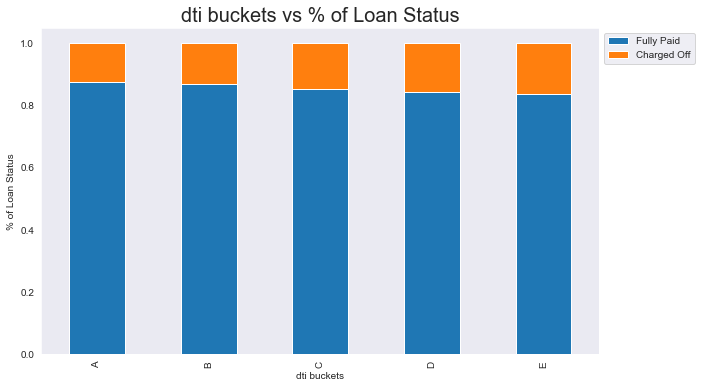

In [71]:
dti_buckets_loan_status_table = pd.crosstab(index=loan_df["dti_buckets"], 
                          columns=loan_df["loan_status"])
dti_buckets_loan_status_table_perc = dti_buckets_loan_status_table[["Fully Paid","Charged Off"]].apply(lambda x: x/x.sum(), axis=1)
dti_buckets_loan_status_table_perc.plot(kind="bar", stacked="True", figsize=[10,6])
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("dti buckets vs % of Loan Status",fontsize=20)
plt.xlabel("dti buckets",fontsize=10)
plt.ylabel("% of Loan Status",fontsize=10)
plt.savefig('dti_buckets_percent_status.png')
plt.show()

### The applicants with higher dti are likely to default more than that of applicants with lower dti

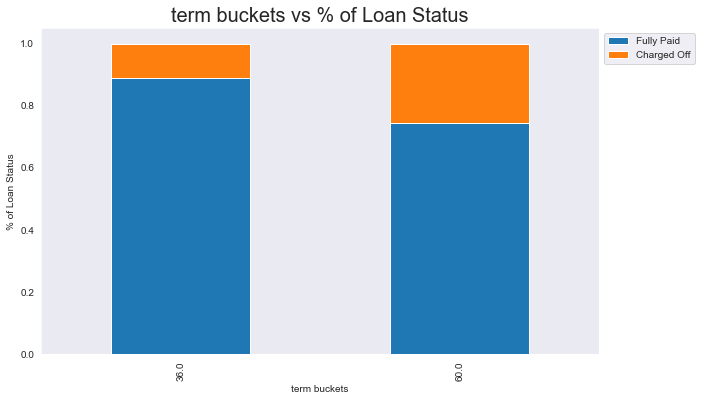

In [72]:
term_buckets_loan_status_table = pd.crosstab(index=loan_df["term"], 
                          columns=loan_df["loan_status"])
term_buckets_loan_status_table_perc = term_buckets_loan_status_table[["Fully Paid","Charged Off"]].apply(lambda x: x/x.sum(), axis=1)
term_buckets_loan_status_table_perc.plot(kind="bar", stacked="True", figsize=[10,6])
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("term buckets vs % of Loan Status",fontsize=20)
plt.xlabel("term buckets",fontsize=10)
plt.ylabel("% of Loan Status",fontsize=10)
plt.savefig('term_buckets_percent_status.png')
plt.show()

### The loans with 60 months term are likely to default more than that of loans with 36 months term

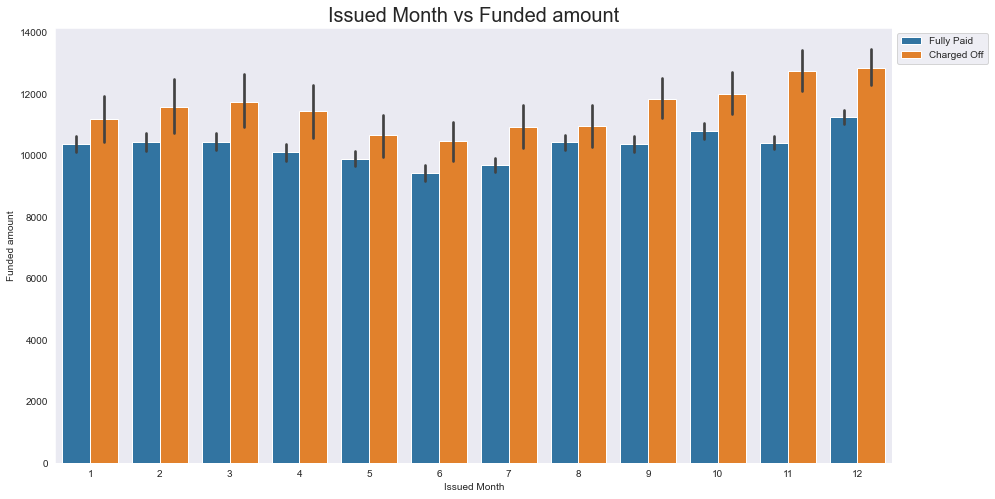

In [90]:
plt.figure(figsize=(15,8))
sns.barplot(data=loan_df, x="issued_month",y="funded_amnt", hue="loan_status")
plt.title("Issued Month vs Funded amount",fontsize=20)
plt.xlabel("Issued Month",fontsize=10)
plt.ylabel("Funded amount",fontsize=10)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig('month_amount.png')
plt.show()

### The loans issued in Nov and Dec are having higher chances of going default